In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from functools import partial
import cv2 
from glob import glob
import matplotlib.pyplot as plt
import scipy.io as io

In [2]:
anno_path = glob('/home/spow12/Codes/Data/MPIIGaze/Data/Original/*/*/annotation.txt')
image_path = glob('/home/spow12/Codes/Data/MPIIGaze/Data/Original/*/*/*.jpg')
image_path.sort()
anno_path.sort()

In [3]:
# anno_df = pd.read_csv(anno_path[0], sep = ' ' ,header= None)
# landmarks = anno_df.iloc[:, :24]

In [4]:
# landmarks

In [5]:
# temp = list(landmarks.loc[0])
# img = cv2.imread(image_path[0])
#for i in range(0, len(temp), 2):
 #   img = cv2.line(img,(temp[i],temp[i+1]),(temp[i],temp[i +1]),(255,0,0),5)

In [6]:
# i = 18
# img = cv2.line(img,(temp[i],temp[i+1]),(temp[i],temp[i +1]),(255,0,0),5)

In [7]:
def get_width(arr, direction): # dlib's eye 6 point landamrk 
    if direction == 0:  # left
        width_top = [(arr[2] + arr[4]) // 2, (arr[3] + arr[5]) // 2]
        width_bottom = [(arr[8] + arr[10]) // 2, (arr[9] + arr[11]) // 2]
    if direction == 1: # right 
        width_top = [(arr[14] + arr[16]) // 2, (arr[15] + arr[17]) // 2]
        width_bottom = [(arr[20] + arr[22]) // 2, (arr[21] + arr[23]) // 2]
    return width_top, width_bottom

def get_height(arr, direction):
    if direction == 0:  # left
        height_left = [arr[0], arr[1]]
        height_right = [arr[6], arr[7]]
    if direction == 1: # right 
        height_left = [arr[12], arr[13]]
        height_right = [arr[18], arr[19]]
    return height_left, height_right

def draw_dot(img_path, arr):
    image = cv2.imread(img_path)
    image_dot = cv2.line(image,(arr[0],arr[1]),(arr[0],arr[1]),(255,0,0),5)
    plt.imshow(image_dot)

In [8]:
def make_coordinate(arr, direction):
    if direction == 0:
        top, bottom = get_width(arr, 0)
        left, right = get_height(arr, 0)
    elif direction == 1:
        top, bottom = get_width(arr, 1)
        left, right = get_height(arr, 1)
    

In [10]:
def add(array,mod, num = 15):
    arr = array.copy()
    if mod == 0: #left
        arr[0] -= num
    elif mod == 1: #right
        arr[0] += num
    elif mod == 2: # top
        arr[1] -= num
    elif mod == 3: # bottom
        arr[1] += num
    return arr

In [ ]:
# mod_left = add(left, 0)
# mod_right = add(right, 1)
# mod_top = add(top, 2)
# mod_bottom = add(bottom, 3)

# draw_dot(image_path[0], mod_top)

# mod_left, mod_top, mod_right, mod_bottom

# rect_left_top = [mod_left[0], mod_top[1]]
# rect_right_top = [mod_right[0], mod_top[1]]
# rect_left_bottom = [mod_left[0], mod_bottom[1]]
# rect_right_bottom = [mod_right[0], mod_bottom[1]]

# rect_left_top, rect_right_top, rect_right_bottom, rect_left_bottom

# img = cv2.imread(image_path[0])
# h, w, c = img.shape

# dstPoint=np.array([rect_left_top, rect_right_top, rect_right_bottom,
#                    rect_left_bottom], dtype=np.float32)
# srcPoint=np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)
# matrix = cv2.getPerspectiveTransform(dstPoint, srcPoint)

# matrix

# draw_dot(image_path[0], rect_left_top)

# dst = cv2.warpPerspective(img, matrix, (w, h))

In [11]:
def Normalize(arr,img_path):
    mod_left = add(arr[0], 0)
    mod_right = add(arr[1], 1)
    mod_top = add(arr[2], 2)
    mod_bottom = add(arr[3], 3)
    
    rect_left_top = [mod_left[0], mod_top[1]]
    rect_right_top = [mod_right[0], mod_top[1]]
    rect_left_bottom = [mod_left[0], mod_bottom[1]]
    rect_right_bottom = [mod_right[0], mod_bottom[1]]
    
    img = cv2.imread(img_path)
    h, w, c = img.shape
    
    dstPoint=np.array([rect_left_top, rect_right_top, rect_right_bottom,
                   rect_left_bottom], dtype=np.float32)
    srcPoint=np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)
    matrix = cv2.getPerspectiveTransform(dstPoint, srcPoint)
    
    dst = cv2.warpPerspective(img, matrix, (w, h))
    return dst

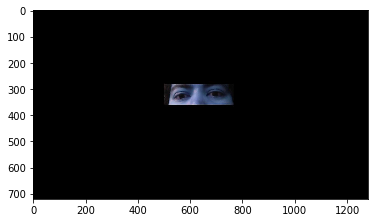

In [12]:
anno_df = pd.read_csv(anno_path[0], sep = ' ' ,header= None)
landmarks = anno_df.iloc[:, :24]
land_ls = list(landmarks.loc[0])
img = cv2.imread(image_path[0])
plt.imshow(img)

In [19]:
top, bottom = get_width(land_ls, 0)  # 0 -> left, 1 -> right
left, right = get_height(land_ls, 0) 

In [20]:
array = [left, right, top, bottom]
dst = Normalize(array, image_path[0])

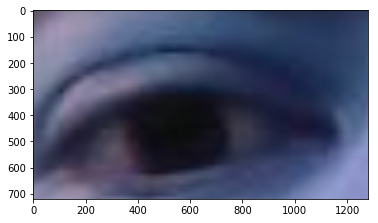

In [21]:
plt.imshow(dst)